In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
len(df)

891

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_grouped,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,"(30, 40]",5
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(20, 30]",0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(10, 20]",0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"(20, 30]",0


In [ ]:
df.isnull().sum()/len(df)*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: >

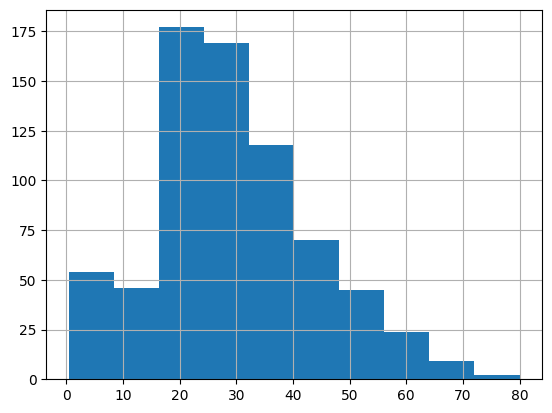

In [ ]:
df['Age'].hist()

In [ ]:
pd.pivot_table(df, values = 'Age', index = 'Survived', aggfunc = 'mean')

,Age
Survived,
0,30.626179
1,28.343690


<Axes: xlabel='Age', ylabel='Count'>

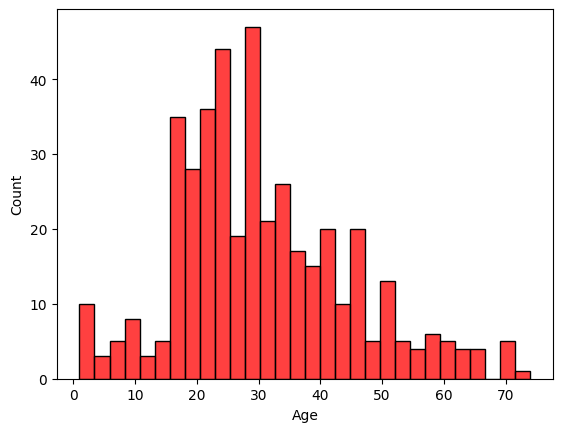

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dead = df[df['Survived'] == 0]
sns.histplot(data = dead, x = 'Age', bins=30, kde=False, color='red')

In [ ]:
df['Age_grouped'] = pd.cut(df['Age'], [0,10,20,30,40,50,60,70,80])

In [ ]:
df[df['Survived'] == 0]['Fare'].mean()
print("Media dei prezzi dei biglietti dei sopravvissuti: ", df[df['Survived'] == 1]['Fare'].mean())
print("Media dei prezzi dei biglietti dei non sopravvissuti: ", df[df['Survived'] == 0]['Fare'].mean())

Media dei prezzi dei biglietti dei sopravvissuti:  48.39540760233918
Media dei prezzi dei biglietti dei non sopravvissuti:  22.117886885245902


In [ ]:
df['Pclass'].value_counts()/len(df)*100

,count
Pclass,
3,55.106622
1,24.242424
2,20.650954


In [ ]:
df[['Survived', 'Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


In [ ]:
df.groupby(df['Pclass'])['Survived'].sum()/df.groupby(df['Pclass'])['Survived'].count()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


<Axes: xlabel='Embarked', ylabel='Count'>

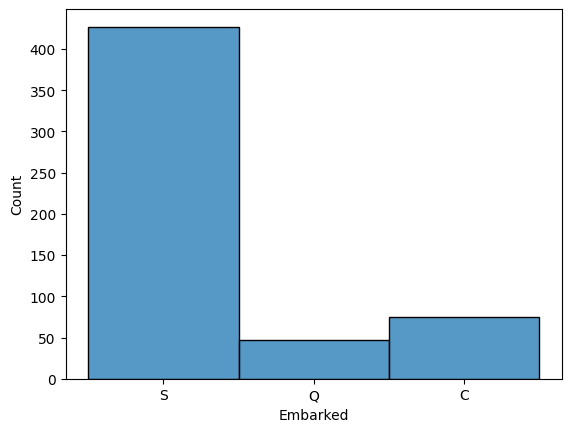

In [ ]:
sns.histplot(data = dead, x = 'Embarked')

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
pd.pivot_table(data = df, values = 'Survived', index = 'Embarked', aggfunc = 'sum')


,Survived
Embarked,
C,93
Q,30
S,217


In [ ]:
pd.pivot_table(data = df, index = 'Embarked', values = 'Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [ ]:
df = df.dropna(subset = ['PassengerId',	'Survived',	'Pclass',
                         'Name',	'Sex',	'Age',	'SibSp',
                         'Parch',	'Ticket',	'Fare',
                         'Embarked',	'Age_grouped'])

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']

<Axes: >

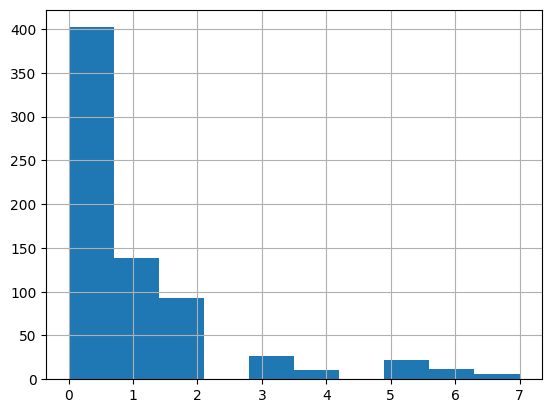

In [ ]:
df['FamilySize'].hist()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder()
enc = OneHotEncoder(handle_unknown='ignore')
ct = ColumnTransformer(transformers = [('OHE', enc, ['Sex', 'Embarked']),
                                       ('MMS', MinMaxScaler(), ['Pclass', 'Age', 'SibSp',	'Parch',	'Fare',	'FamilySize']),
                                       ('kbins', KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy = 'uniform'), ['Fare']),
                                       ('ord', ord, ['Age_grouped'])],
                       remainder = 'passthrough')
ct.fit(df)
new_features = []
for i in ct.get_feature_names_out():
    new_features.append(i)
df_transformed = pd.DataFrame(ct.transform(df), columns = new_features)

In [ ]:
from sklearn.model_selection import train_test_split
df_transformed['remainder__Survived'] = pd.to_numeric(df_transformed['remainder__Survived'])
df_transformed = df_transformed.drop(columns = ['remainder__Name', 'remainder__Ticket', 'remainder__Cabin', 'remainder__PassengerId'])
X_train, X_test, y_train, y_test = train_test_split(df_transformed.drop(columns = ['remainder__Survived']),
                                                    df_transformed['remainder__Survived'],
                                                    test_size = 0.3,
                                                    stratify = df_transformed['remainder__Survived'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  0.8037383177570093


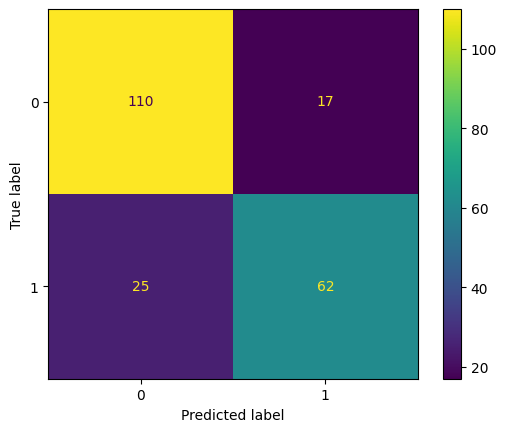

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred, average='binary')[:3]

(0.7848101265822784, 0.7126436781609196, 0.7469879518072289)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
pred_log = log.predict(X_test)
print(accuracy_score(y_test, pred))

0.8037383177570093


(0.8356164383561644, 0.7011494252873564, 0.7625)

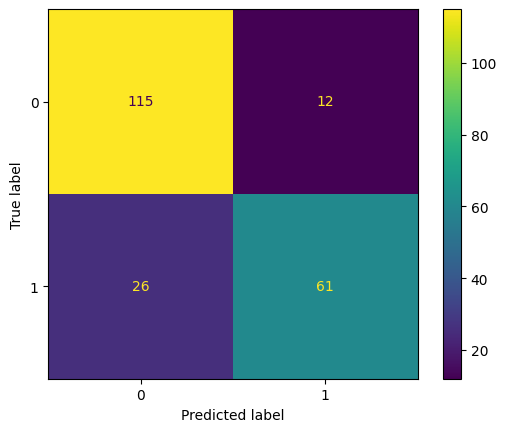

In [ ]:
cm = confusion_matrix(y_test, pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
precision_recall_fscore_support(y_test, pred_log, average='binary')[:3]

In [ ]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[3,5,10],
              'criterion':['gini', 'entropy', 'log_loss']}
dtc_optimised = GridSearchCV(dtc, parameters, cv = 5)
dtc_optimised.fit(X_train, y_train)
opt_pred = dtc_optimised.best_estimator_.predict(X_test)
print(accuracy_score(y_test, opt_pred))

0.8271028037383178


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

df = pd.read_csv('Titanic-Dataset.csv')
df['Survived'] = pd.to_numeric(df['Survived'])
df = df.drop(columns = ['Name', 'Ticket', 'Cabin', 'PassengerId'])
df['Age_grouped'] = pd.cut(df['Age'], [0,10,20,30,40,50,60,70,80])

ct = ColumnTransformer(transformers = [('OHE', enc, ['Sex', 'Embarked']),
                                       ('MMS', MinMaxScaler(), ['Pclass', 'Age', 'SibSp',	'Parch']),
                                       ('ord', ord, ['Age_grouped'])],
                       remainder = 'passthrough')
pca = PCA(n_components=5)
ct_kbins = ColumnTransformer(transformers = [('kbins', KBinsDiscretizer(n_bins = 4, encode='ordinal', strategy='uniform'), ['Fare'])])
fu = FeatureUnion([('kbins', ct_kbins),
                   ('ct', ct)])
pipe = Pipeline(steps = [('fu', fu),
                         ('dtc', dtc)])
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Survived']),
                                                    df['Survived'],
                                                    test_size = 0.3,
                                                    stratify = df['Survived'])
pipe.fit(X_train, y_train)
print(cross_val_score(pipe, df.drop(columns = ['Survived']), df['Survived'], cv = 5).mean())

0.7755884752997302
